# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
import xgboost
import time
from joblib import dump, load
import os

# Load the data

In [2]:
df = pd.read_csv('final_data_new.csv')

In [3]:
df.columns

Index(['minute', 'position_name', 'shot_body_part_name', 'shot_technique_name',
       'shot_type_name', 'shot_first_time', 'shot_one_on_one',
       'shot_aerial_won', 'shot_open_goal', 'shot_follows_dribble',
       'shot_redirect', 'x1', 'y1', 'number_of_players_opponents',
       'number_of_players_teammates', 'is_goal', 'angle', 'distance',
       'x_player_opponent_Goalkeeper', 'x_player_opponent_8',
       'x_player_opponent_1', 'x_player_opponent_2', 'x_player_opponent_3',
       'x_player_teammate_1', 'x_player_opponent_4', 'x_player_opponent_5',
       'x_player_opponent_6', 'x_player_teammate_2', 'x_player_opponent_9',
       'x_player_opponent_10', 'x_player_opponent_11', 'x_player_teammate_3',
       'x_player_teammate_4', 'x_player_teammate_5', 'x_player_teammate_6',
       'x_player_teammate_7', 'x_player_teammate_8', 'x_player_teammate_9',
       'x_player_teammate_10', 'y_player_opponent_Goalkeeper',
       'y_player_opponent_8', 'y_player_opponent_1', 'y_player_oppone

In [4]:
df.head()

,minute,position_name,shot_body_part_name,shot_technique_name,shot_type_name,shot_first_time,shot_one_on_one,shot_aerial_won,shot_open_goal,shot_follows_dribble,...,y_player_teammate_5,y_player_teammate_6,y_player_teammate_7,y_player_teammate_8,y_player_teammate_9,y_player_teammate_10,x_player_opponent_7,y_player_opponent_7,x_player_teammate_Goalkeeper,y_player_teammate_Goalkeeper
0,2,Left Center Forward,Right Foot,Half Volley,Open Play,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,26.6,53.1,NaN,NaN
1,5,Left Back,Left Foot,Volley,Open Play,True,False,False,False,False,...,20.6,32.8,NaN,NaN,NaN,NaN,23.8,31.2,NaN,NaN
2,15,Left Center Forward,Left Foot,Normal,Open Play,False,False,False,False,False,...,29.0,NaN,NaN,NaN,NaN,NaN,29.6,55.3,NaN,NaN
3,16,Center Forward,Head,Normal,Open Play,False,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,26.7,60.4,NaN,NaN
4,18,Right Center Forward,Right Foot,Normal,Open Play,False,False,False,False,False,...,27.9,31.4,33.4,NaN,NaN,NaN,16.9,40.1,NaN,NaN


# Data preparation

In [43]:
# df[['minute', 
#     'number_of_players_opponents', 
#     'number_of_players_teammates']] = df[['minute', 
#                                           'number_of_players_opponents', 
#                                           'number_of_players_teammates']].astype(float)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[['position_name', 
    'shot_technique_name', 
    'shot_type_name', 
    'shot_body_part_name']] = enc.fit_transform(df[['position_name', 
                                  'shot_technique_name', 
                                  'shot_type_name',
                                  'shot_body_part_name']])

In [6]:
df[['minute', 
    'position_name', 
    'shot_technique_name', 
    'shot_type_name', 
    'shot_body_part_name']] = df[['minute', 
        'position_name', 
    'shot_technique_name', 
    'shot_type_name', 
    'shot_body_part_name']].astype(int)

In [7]:
df

,minute,position_name,shot_body_part_name,shot_technique_name,shot_type_name,shot_first_time,shot_one_on_one,shot_aerial_won,shot_open_goal,shot_follows_dribble,...,y_player_teammate_5,y_player_teammate_6,y_player_teammate_7,y_player_teammate_8,y_player_teammate_9,y_player_teammate_10,x_player_opponent_7,y_player_opponent_7,x_player_teammate_Goalkeeper,y_player_teammate_Goalkeeper
0,2,9,3,2,3,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,26.6,53.1,NaN,NaN
1,5,7,1,6,3,True,False,False,False,False,...,20.6,32.8,NaN,NaN,NaN,NaN,23.8,31.2,NaN,NaN
2,15,9,1,4,3,False,False,False,False,False,...,29.0,NaN,NaN,NaN,NaN,NaN,29.6,55.3,NaN,NaN
3,16,3,0,4,3,False,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,26.7,60.4,NaN,NaN
4,18,18,3,4,3,False,False,False,False,False,...,27.9,31.4,33.4,NaN,NaN,NaN,16.9,40.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82816,79,0,3,2,3,True,False,False,False,False,...,30.9,NaN,NaN,NaN,NaN,NaN,30.8,40.3,NaN,NaN
82817,80,20,3,4,3,False,False,False,False,False,...,60.2,NaN,NaN,NaN,NaN,NaN,31.9,47.7,NaN,NaN
82818,82,0,3,4,3,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82819,84,21,3,4,3,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dump(enc,'labelEncoder.joblib')

['labelEncoder.joblib']

In [9]:
enc2 = load('labelEncoder.joblib')

In [49]:
# df[['position_name', 
#     'shot_technique_name', 
#     'shot_type_name', 
#     'shot_body_part_name']] = enc2.inverse_transform(df[['position_name', 
#     'shot_technique_name', 
#     'shot_type_name',
#     'shot_body_part_name']])



In [50]:
# df[['position_name', 
#     'shot_technique_name', 
#     'shot_type_name', 
#     'shot_body_part_name']] = enc2.transform(df[['position_name', 
#     'shot_technique_name', 
#     'shot_type_name', 
#     'shot_body_part_name']])

In [51]:
# enc.inverse_transform(df[['position_name', 
#     'shot_technique_name', 
#     'shot_type_name',
#     'shot_body_part_name']])

In [52]:
# ############### NEW ################
# from sklearn.preprocessing import LabelEncoder

# le_posiotion_name = LabelEncoder()
# le_shot_technique_name = LabelEncoder()
# le_shot_type_name = LabelEncoder()
# le_shot_body_part_name = LabelEncoder()

# df['position_name'] = le_posiotion_name.fit_transform(df['position_name'])
# df['shot_technique_name'] = le_shot_technique_name.fit_transform(df['shot_technique_name'])
# df['shot_type_name'] = le_shot_type_name.fit_transform(df['shot_type_name'])
# df['shot_body_part_name'] = le_shot_body_part_name.fit_transform(df['shot_body_part_name'])

In [10]:
# Change the type of categorical features to 'category' 
df[['position_name', 
    'shot_technique_name', 
    'shot_type_name', 
    'number_of_players_opponents', 
    'number_of_players_teammates', 
    'shot_body_part_name']] = df[['position_name', 
                                  'shot_technique_name', 
                                  'shot_type_name', 
                                  'number_of_players_opponents', 
                                  'number_of_players_teammates', 
                                  'shot_body_part_name']].astype('category')

In [11]:
# Splitting the dataset into features (X) and the target variable (y)
y = pd.DataFrame(df['is_goal'])
X = df.drop(['is_goal'], axis=1)

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [12]:
count_class_0, count_class_1 = y_train.value_counts()

# Display the count of shots attempted in the training set
print('Shots attempted in the training set:', count_class_0)

# Display the count of successful goals in the training set
print('Goals scored in the training set:', count_class_1)

Shots attempted in the training set: 58970
Goals scored in the training set: 7286


In [13]:
# Class imbalance in training data
scale_pos_weight = count_class_0 / count_class_1
print(f' Class imbalance in training data: {scale_pos_weight:.3f}')

 Class imbalance in training data: 8.094


# Training XGBoost model 

In [14]:
# Define the xgboost model
xgb_model = xgboost.XGBClassifier(enable_categorical=True, tree_method='hist', objective='binary:logistic')

In [15]:
# Defining the hyper-parameter grid for XG Boost
param_grid_xgb = {'learning_rate': [0.01, 0.001, 0.0001],
              'max_depth': [3, 5, 7, 8, 9],
              'n_estimators': [100, 150, 200, 250, 300],
              'scale_pos_weight': [1, scale_pos_weight]}

In [16]:
# Starting the timer
start_time = time.time()

# Perform grid search with cross-validation
grid_xg = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the best model on the entire training set
grid_xg.fit(X_train, y_train)

# Take the best parameters for xgboost model
best_xgb_model = grid_xg.best_estimator_

# Stopping the timer
stop_time = time.time()

# Training Time
xgb_training_time = stop_time - start_time

In [17]:
# Print the best parameters and training time
print("Best parameters: ", grid_xg.best_params_)
print (f"Model Training Time: {xgb_training_time:.3f} seconds")

Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 1}
Model Training Time: 1393.345 seconds


# Model evaluation

## Training set

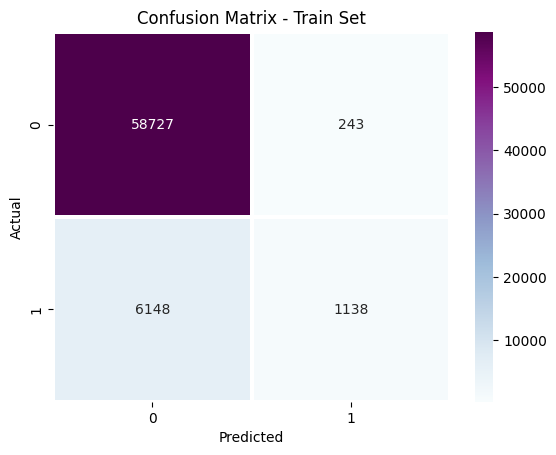

In [18]:
# Evaluate the model on training set
y_pred_train = best_xgb_model.predict(X_train)

# Confusion Matrix for Training Data
cm_train_xg = confusion_matrix(y_train, y_pred_train)
ax = sns.heatmap(cm_train_xg, annot=True, cmap='BuPu', fmt='g', linewidth=1.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')
plt.show()

## Test set

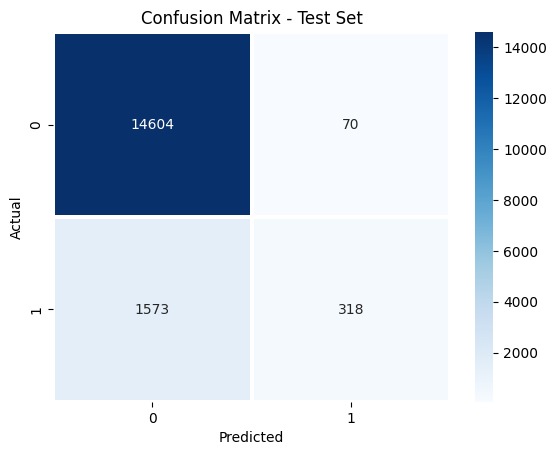

In [19]:
# Evaluate the model on test set
y_pred_test = best_xgb_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test_xgb = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cm_test_xgb, annot=True, cmap='Blues', fmt='g', linewidth=1.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')
plt.show()

In [20]:
# Number of goals in test set
print(f'The test dataset contains {len(y_test)} shots, with {y_test.sum()["is_goal"]} of them being goals.')

The test dataset contains 16565 shots, with 1891 of them being goals.


## Feature importance

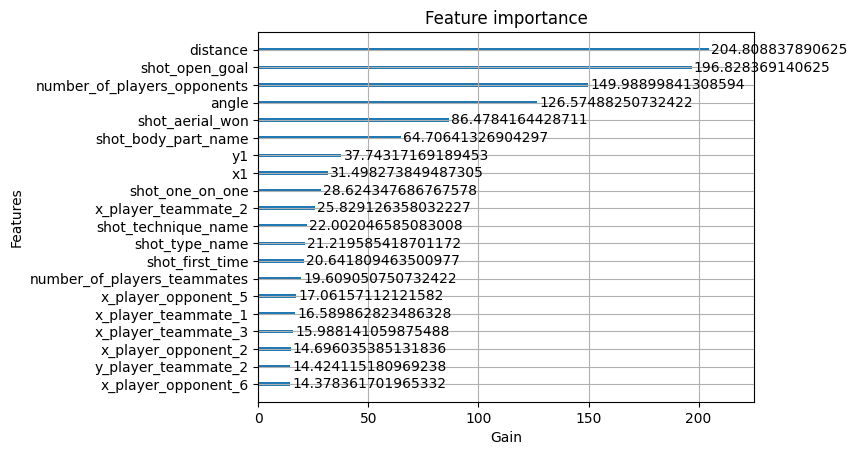

In [21]:
# Plot feature importance with Gain
xgboost.plot_importance(best_xgb_model, importance_type='gain', xlabel='Gain', max_num_features=20)
plt.show()

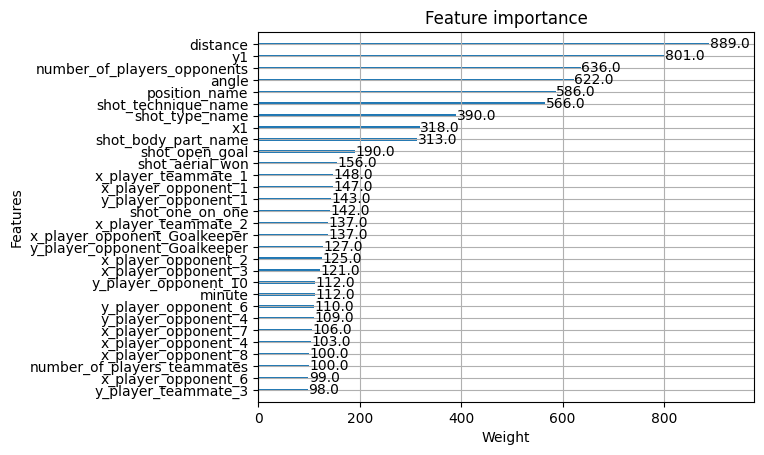

In [22]:
# Plot feature importance with Weight
xgboost.plot_importance(best_xgb_model, importance_type='weight', xlabel='Weight', max_num_features=30)
plt.show()

## Summary

In [23]:
# Calculating MAE, RMSE and R2 for training and test sets 
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

In [24]:
# Creating of dataframe of summary results
summary_df = pd.DataFrame({'Model Name':['XG Boost'],
                          'Training MAE': mae_train, 
                          'Training RMSE': rmse_train,
                          'Training R2':r2_train,
                          'Testing MAE': mae_test, 
                          'Testing RMSE': rmse_test,
                          'Testing R2':r2_test,
                          'Training Time (mins)': xgb_training_time/60})
summary_df.set_index('Model Name', inplace=True)

# Displaying summary of results
summary_df.style.format(precision =5).set_properties(**{'font-weight': 'bold',
            'border': '2.0px solid grey','color': 'white'})

,Training MAE,Training RMSE,Training R2,Testing MAE,Testing RMSE,Testing R2,Training Time (mins)
Model Name,,,,,,,
XG Boost,0.09646,0.31058,0.01446,0.09919,0.31494,0.01918,23.22242


# Keeping the xgboost model

In [25]:
# Save the model
best_xgb_model.save_model('xgboost.json')

best_xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': True,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None}

In [69]:
# Save the model
# dump(best_xgb_model, 'xgboost.joblib') 

# # Load the model
# model = load('xgboost.joblib')

In [26]:
best_xgb_model.predict_proba(X)

array([[0.9021414 , 0.09785861],
       [0.9434396 , 0.05656038],
       [0.9602713 , 0.0397287 ],
       ...,
       [0.8207403 , 0.17925973],
       [0.88015527, 0.11984473],
       [0.9733864 , 0.02661358]], dtype=float32)

In [27]:
new_xgb_model = xgboost.XGBClassifier()
new_xgb_model.load_model('xgboost.json')

In [28]:
new_xgb_model.predict_proba(X)

array([[0.9021414 , 0.09785861],
       [0.9434396 , 0.05656038],
       [0.9602713 , 0.0397287 ],
       ...,
       [0.8207403 , 0.17925973],
       [0.88015527, 0.11984473],
       [0.9733864 , 0.02661358]], dtype=float32)